# Projekt PRiAD Natalia Biernacka, Anton Libik
### Wybrany zbiór danych: Titanic Survival Prediction Dataset

Data wykonania: 29.01.2025 r.


### Pobranie i wczytanie danych

Import niezbędnych pakietów

In [168]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format 

In [169]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset") 

file_path = os.path.join(path, 'Titanic-Dataset.csv')
dane = pd.read_csv(file_path)
dane.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


### Analiza eksploracyjna

#### Przygotowanie

1) Wyznaczamy liczbę obiektów, liczbę atrybutów. Usuwamy kolumny PassengetId, Ticket i Name - nie są one potrzebne dla dalszej analizy.


In [170]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

# usuwanie kolumny PassengerId i Name
dane.drop(columns=['PassengerId'], inplace=True)
dane.drop(columns=['Name'], inplace=True)
dane.drop(columns=['Ticket'], inplace=True)

Liczba obiektów: 891
Liczba atrybutow: 12


2. Liczba obiektów, reprezentujących pasażerów, którzy przeżyli (atrybut survived ma 1) i którzy nie (survived = 0)

In [171]:
survivedDF = dane[dane.Survived == 1]

notSurvivedDF = dane[dane.Survived == 0]

print("Liczba pasażerów, którzy przeżyli: ", survivedDF.shape[0])
print("Liczba pasażerów, którzy nie przeżyli: ", notSurvivedDF.shape[0])

procent = survivedDF.shape[0] / dane.shape[0] * 100
print("Ile procent przeżyło: ", round(procent, 2), "%")

Liczba pasażerów, którzy przeżyli:  342
Liczba pasażerów, którzy nie przeżyli:  549
Ile procent przeżyło:  38.38 %


3. Liczba brakujących danych w poszczególnych kolumnach

In [172]:
dane.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

4. Usuwamy kolumnę "Cabin", ponieważ zawiera dużą liczbę brakujących danyh i będzie przeszkadzać analizie. Zamiast brakujących danych w kolumnie "Age" wstawiamy dane średniego wieku.

In [173]:
# usuwamy kolumnę Cabin
dane.drop(columns=['Cabin'], inplace=True)

# wstawiamy średni wiek zamiast brakujących danych w kolumnie Age
dane['Age'] = dane['Age'].fillna(dane['Age'].median())

# sprawdzamy liczbę brakujących danych 
dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

5. Usuwamy pozostałe brakujące dane

In [174]:
dane = dane.dropna()

dane.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

6. Zbiór został przygotowany do analizy ekploracyjnej, ostateczna liczba obiektów i atrybutów:

In [175]:
# liczba obiektów
print("Liczba obiektów:", dane.shape[0])

# liczba atrybutów
print("Liczba atrybutow:", dane.shape[1])

Liczba obiektów: 889
Liczba atrybutow: 8


#### Analiza zmienności atrybutów bez odniesienia do przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    889.00  889.00 889.00 889.00 889.00 889.00
mean       0.38    2.31  29.32   0.52   0.38  32.10
std        0.49    0.83  12.98   1.10   0.81  49.70
min        0.00    1.00   0.42   0.00   0.00   0.00
25%        0.00    2.00  22.00   0.00   0.00   7.90
50%        0.00    3.00  28.00   0.00   0.00  14.45
75%        1.00    3.00  35.00   1.00   0.00  31.00
max        1.00    3.00  80.00   8.00   6.00 512.33


<Axes: xlabel='Embarked', ylabel='Count'>

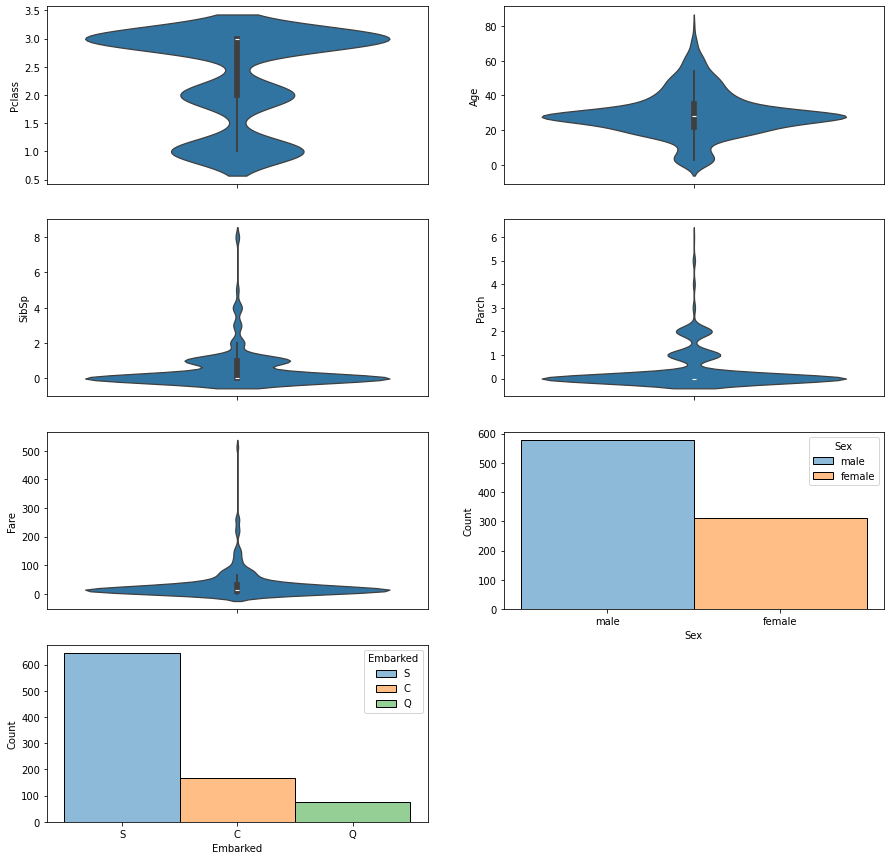

In [176]:
print(dane.describe())

plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.violinplot(data=dane['Pclass'])
plt.subplot(4,2,2)
sns.violinplot(data=dane['Age'])
plt.subplot(4,2,3)
sns.violinplot(data=dane['SibSp'])
plt.subplot(4,2,4)
sns.violinplot(data=dane['Parch'])
plt.subplot(4,2,5)
sns.violinplot(data=dane['Fare'])
plt.subplot(4,2,6)
sns.histplot(data=dane, x="Sex", hue="Sex")
plt.subplot(4,2,7)
sns.histplot(data=dane, x="Embarked", hue="Embarked")

#### Analiza zmienności atrybutów w zależności od przeżycia

       Survived  Pclass    Age  SibSp  Parch   Fare
count    549.00  549.00 549.00 549.00 549.00 549.00
mean       0.00    2.53  30.03   0.55   0.33  22.12
std        0.00    0.74  12.50   1.29   0.82  31.39
min        0.00    1.00   1.00   0.00   0.00   0.00
25%        0.00    2.00  23.00   0.00   0.00   7.85
50%        0.00    3.00  28.00   0.00   0.00  10.50
75%        0.00    3.00  35.00   1.00   0.00  26.00
max        0.00    3.00  74.00   8.00   6.00 263.00
       Survived  Pclass    Age  SibSp  Parch   Fare
count    340.00  340.00 340.00 340.00 340.00 340.00
mean       1.00    1.96  28.16   0.48   0.47  48.21
std        0.00    0.86  13.67   0.71   0.77  66.75
min        1.00    1.00   0.42   0.00   0.00   0.00
25%        1.00    1.00  21.00   0.00   0.00  12.44
50%        1.00    2.00  28.00   0.00   0.00  26.00
75%        1.00    3.00  35.00   1.00   1.00  56.95
max        1.00    3.00  80.00   4.00   5.00 512.33


<Axes: xlabel='Survived', ylabel='count'>

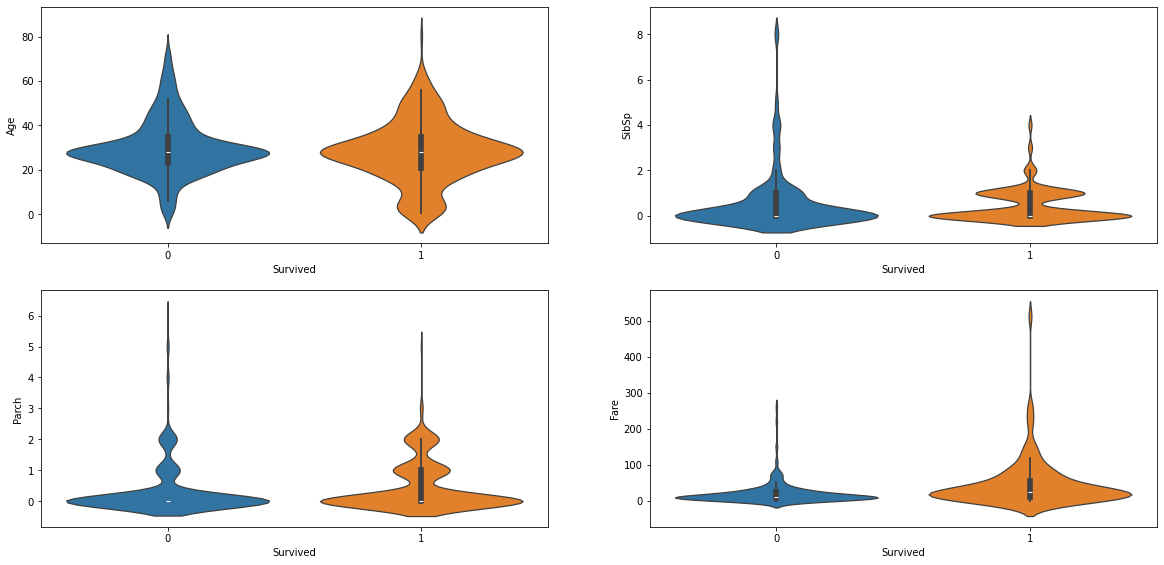

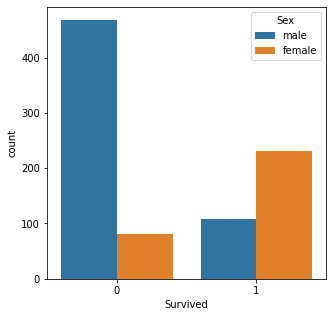

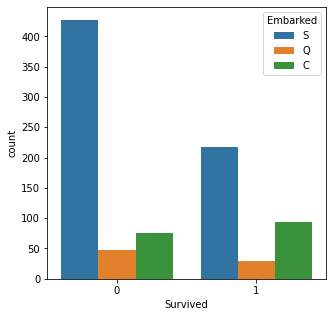

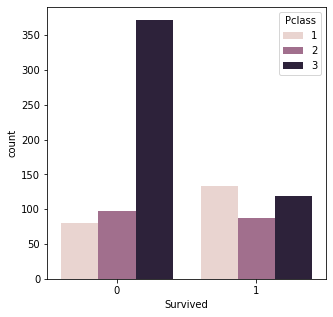

In [177]:
print(dane[dane['Survived'] == 0].describe())
print(dane[dane['Survived'] == 1].describe())
plt.figure(figsize= (20,20))
plt.subplot(4, 2, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=dane, legend=False, hue = 'Survived')
plt.subplot(4, 2, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=dane, legend=False, hue = 'Survived')
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Sex")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Embarked")
plt.figure(figsize= (5,5))
plt.xticks([0, 1])
sns.countplot(data=dane, x="Survived", hue="Pclass")

Wnioski
* Rozkład wartości atrybutów Age, SibSp, Parch i Fare dla pasażerów, którzy przeżyli i nie przeżyli jest podobny. Możemy jednak dostrzec kilka charakterystycznych cech:
    - większość dzieci (wiek ok. 10 lat) przeżyła
    - większość osób, których cena biletu wynosiła powyżej 100 przeżyło
    - osoby z najdroższymi biletami (Fare) przeżyły
* Przeżywalność jest w dużym stopniu zależna od płci. Większość kobiet przeżyła, zaś znaczna większość mężczyzn zginęła.
* Port, z którego pasażer wszedł na pokład nie ma większego znaczenia.
* Na przeżywalność silnie wpłynęła klasa, w której podróżował pasażer - większość osób z klasy 1 przeżyło zaś z klasy 3 zdecydowana większość zginęła

##### Wykres punktowy

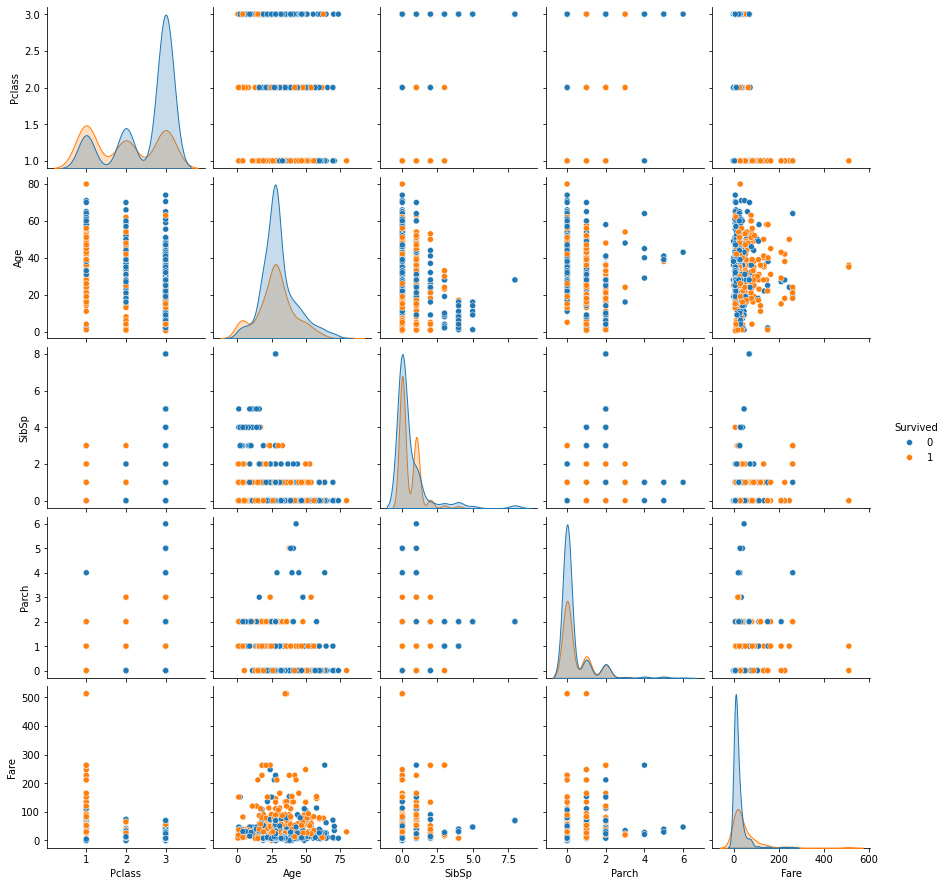

In [178]:
sns.pairplot(dane, kind = 'scatter', hue = "Survived")

#### Korelacja

          Survived  Pclass   Age  SibSp  Parch  Fare
Survived      1.00   -0.34 -0.07  -0.03   0.08  0.26
Pclass       -0.34    1.00 -0.34   0.08   0.02 -0.55
Age          -0.07   -0.34  1.00  -0.23  -0.17  0.09
SibSp        -0.03    0.08 -0.23   1.00   0.41  0.16
Parch         0.08    0.02 -0.17   0.41   1.00  0.22
Fare          0.26   -0.55  0.09   0.16   0.22  1.00


<Axes: >

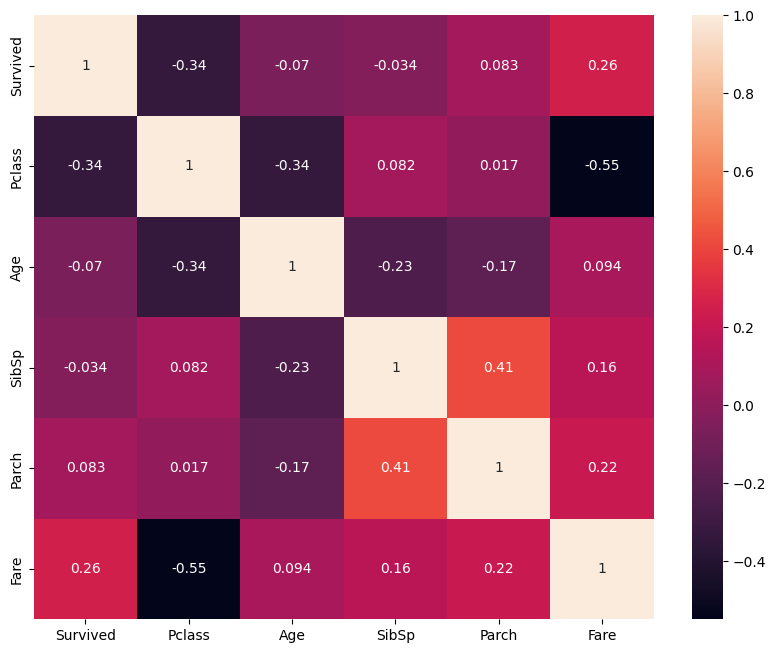

In [179]:
kor = dane.loc[:, np.logical_and(dane.columns != "Sex", dane.columns != "Embarked")].corr()
print(kor)
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

Wnioski:
* korelacja między atybutami opisującymi:
    - najsilniej skolerowane są cena biletu (Fare) oraz klasa (Pclass) - cena biletu wyższa dla klasy 1, nieco niższa dla klasy 2 i najniższa dla klasy 3
    - wysoka korekacja w porównaniu do pozostałych jest również dla liczby rodzeństwa/małżonków oraz rodziców/dzieci na pokładzie, gdyż oba odnoszą do liczby bliskich, z którymi dana osoba podróżowała
    - korelacje te nie mają jednak wartości bliskich -1 lub 1, więc pozostawiamy wszystkie atrybuty 
* z przeżywalnością (survived) najsilniej skolerowana jest klasa, co potwierdza wnioski z analizy zmienności atrybutów

### Uczenie nadzorowane

#### Przygotowanie

Żeby wygodniej było prowadzić uczenie nadzorowane, zamieniamy wartości column Sex i Embarked na wartości liczbowe według następnego schematu:  
Sex - (male => 1, female => 0),  
Emarked - (C => 1, S => 2, Q => 3)

In [180]:
print(dane.head())

dane['Sex'] = np.where(dane['Sex'] == 'male', 1, 0)
dane['Embarked'] = np.where(dane['Embarked'] == 'C', 1, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'S', 2, dane['Embarked'])
dane['Embarked'] = np.where(dane['Embarked'] == 'Q', 3, dane['Embarked'])
dane['Embarked']=dane['Embarked'].astype(int)

print(dane.head())

   Survived  Pclass     Sex   Age  SibSp  Parch  Fare Embarked
0         0       3    male 22.00      1      0  7.25        S
1         1       1  female 38.00      1      0 71.28        C
2         1       3  female 26.00      0      0  7.92        S
3         1       1  female 35.00      1      0 53.10        S
4         0       3    male 35.00      0      0  8.05        S
   Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
0         0       3    1 22.00      1      0  7.25         2
1         1       1    0 38.00      1      0 71.28         1
2         1       3    0 26.00      0      0  7.92         2
3         1       1    0 35.00      1      0 53.10         2
4         0       3    1 35.00      0      0  8.05         2


Wykresy, które pozwolą na określenie, które atrybuty są bardziej, a które mniej istotne w kontekscie uczenia nadzorowanego

   Survived  Pclass  Sex   Age  SibSp  Parch  Fare  Embarked
0         0       3    1 22.00      1      0  7.25         2
1         1       1    0 38.00      1      0 71.28         1
2         1       3    0 26.00      0      0  7.92         2
3         1       1    0 35.00      1      0 53.10         2
4         0       3    1 35.00      0      0  8.05         2
          Survived  Pclass   Sex   Age  SibSp  Parch  Fare  Embarked
Survived      1.00   -0.34 -0.54 -0.07  -0.03   0.08  0.26     -0.13
Pclass       -0.34    1.00  0.13 -0.34   0.08   0.02 -0.55      0.31
Sex          -0.54    0.13  1.00  0.09  -0.12  -0.25 -0.18      0.02
Age          -0.07   -0.34  0.09  1.00  -0.23  -0.17  0.09     -0.04
SibSp        -0.03    0.08 -0.12 -0.23   1.00   0.41  0.16      0.03
Parch         0.08    0.02 -0.25 -0.17   0.41   1.00  0.22     -0.04
Fare          0.26   -0.55 -0.18  0.09   0.16   0.22  1.00     -0.27
Embarked     -0.13    0.31  0.02 -0.04   0.03  -0.04 -0.27      1.00


<Axes: title={'center': 'Embarked = 3'}, xlabel='Sex', ylabel='count'>

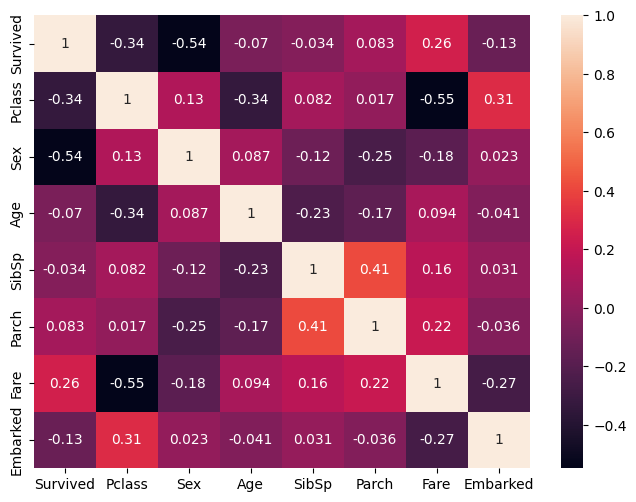

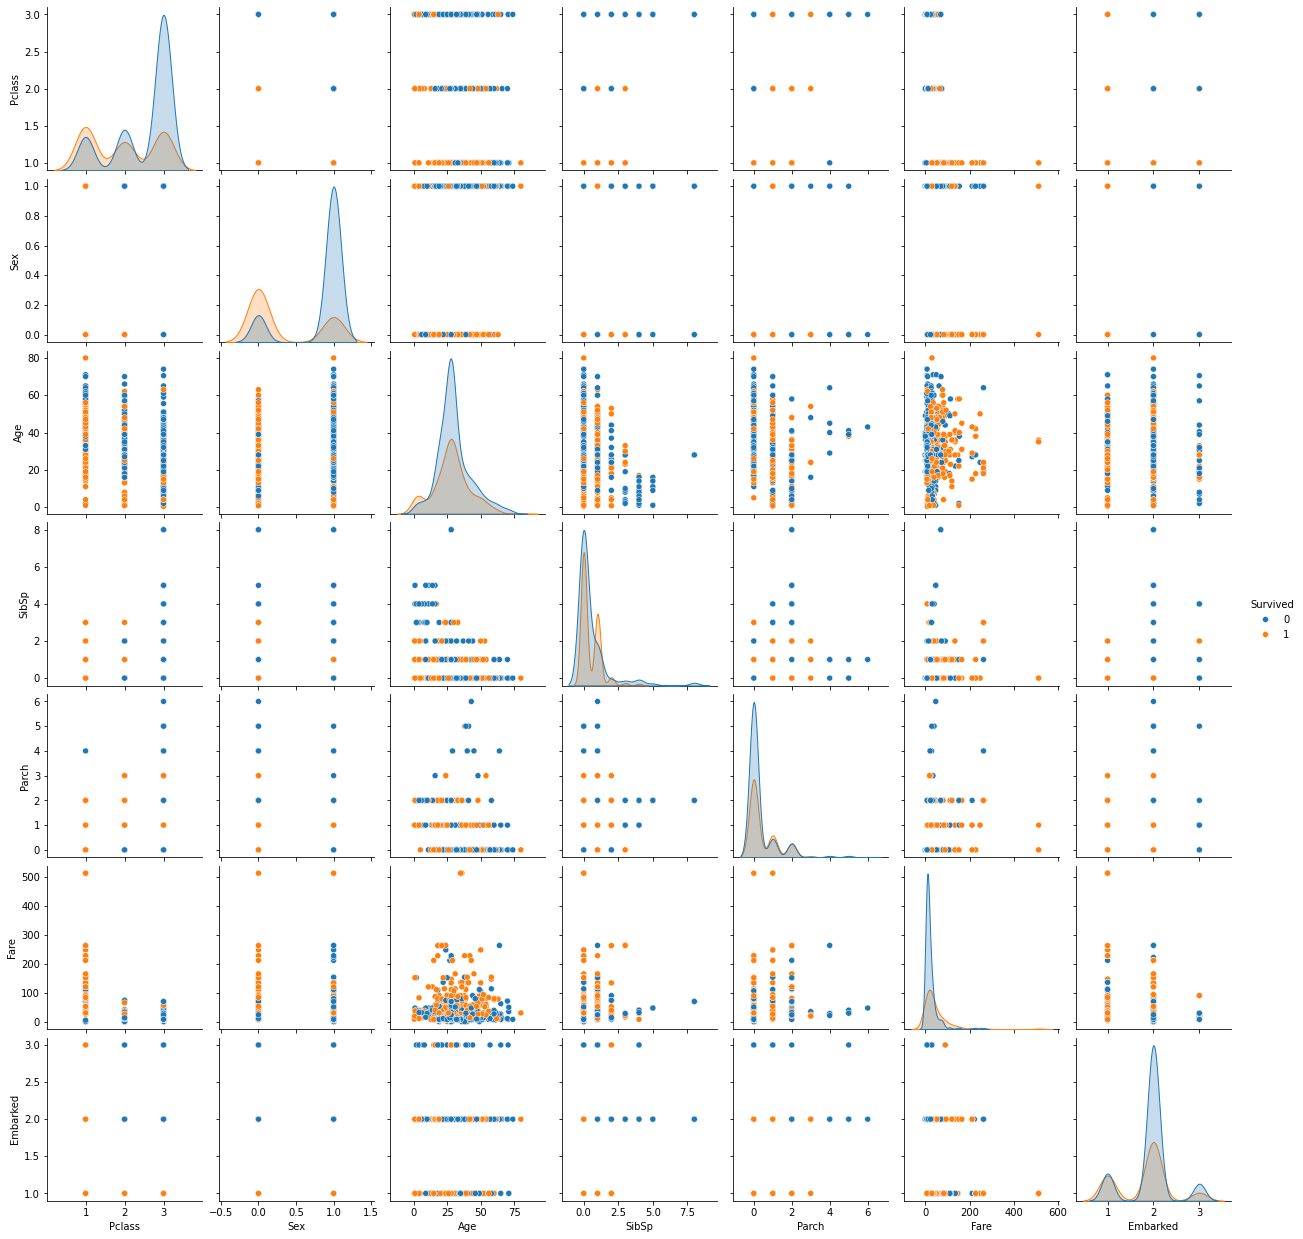

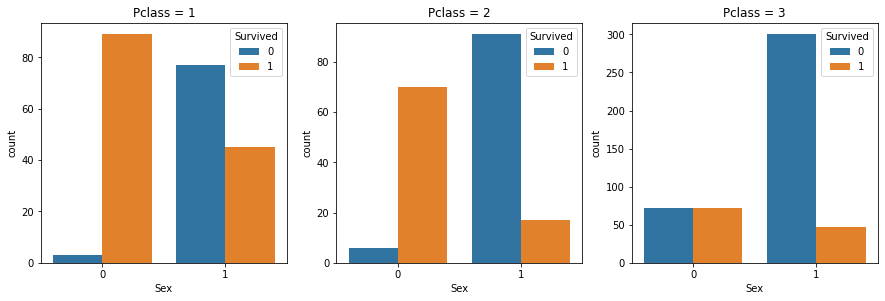

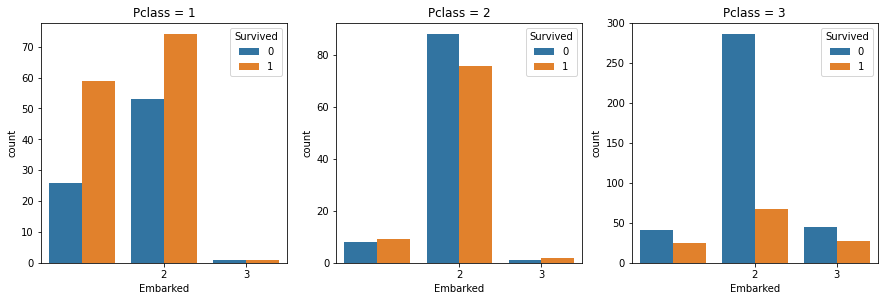

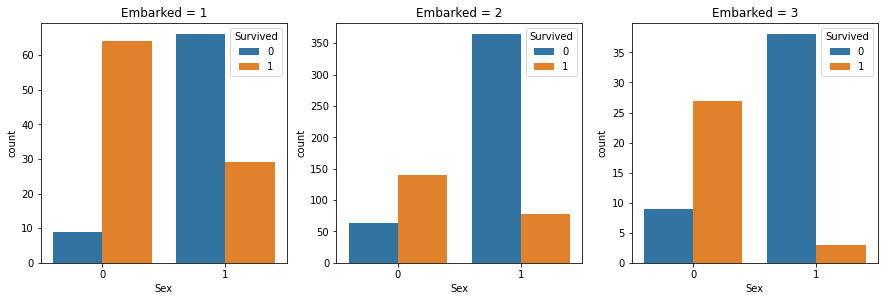

In [181]:
print(dane.head())
kor = dane.corr()
print(kor)
plt.figure(figsize=(8,6), dpi =100)
sns.heatmap(kor, annot=kor)

sns.pairplot(dane, kind = 'scatter', hue = "Survived")
plt.figure(figsize= (15,15))
plt.subplot(3, 3, 1)
plt.xticks([0,1])
plt.title("Pclass = 1")
sns.countplot(data=dane[dane["Pclass"]==1], x="Sex", hue="Survived")
plt.subplot(3, 3, 2)
plt.xticks([0,1])
plt.title("Pclass = 2")
sns.countplot(data=dane[dane["Pclass"]==2], x="Sex", hue="Survived")
plt.subplot(3, 3, 3)
plt.xticks([0,1])
plt.title("Pclass = 3")
sns.countplot(data=dane[dane["Pclass"]==3], x="Sex", hue="Survived")

plt.figure(figsize= (15,15))
plt.subplot(3, 3, 1)
plt.xticks([1,2,3])
plt.title("Pclass = 1")
sns.countplot(data=dane[dane["Pclass"]==1], x="Embarked", hue="Survived")
plt.subplot(3, 3, 2)
plt.xticks([1,2,3])
plt.title("Pclass = 2")
sns.countplot(data=dane[dane["Pclass"]==2], x="Embarked", hue="Survived")
plt.subplot(3, 3, 3)
plt.xticks([1,2,3])
plt.title("Pclass = 3")
sns.countplot(data=dane[dane["Pclass"]==3], x="Embarked", hue="Survived")

plt.figure(figsize= (15,15))
plt.subplot(3, 3, 1)
plt.xticks([0,1])
plt.title("Embarked = 1")
sns.countplot(data=dane[dane["Embarked"]==1], x="Sex", hue="Survived")
plt.subplot(3, 3, 2)
plt.xticks([0,1])
plt.title("Embarked = 2")
sns.countplot(data=dane[dane["Embarked"]==2], x="Sex", hue="Survived")
plt.subplot(3, 3, 3)
plt.xticks([0,1])
plt.title("Embarked = 3")
sns.countplot(data=dane[dane["Embarked"]==3], x="Sex", hue="Survived")


Z wykresów możemy wyciągnąć wniosek, że najbardziej istotnymi dla nas będą pary atrybutów: 
* wykresy kolumnowe: Sex i Pclass, Sex i Embarked, 
* wykresy punktowe: Pclass i Age, Sex i Age, Fare i Sex

#### Import niezbędnych pakietów oraz funkcje dzielenia zbioru na ucząct i testowy, weryfikacji i wyświtlenia granic

In [182]:
# zdefiniowanie niezbędnych funkcji
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn import tree

def podziel(dane,proporcja):
    df = dane.copy()
    X = df.drop('Survived', axis = 1)
    Y = df['Survived'].astype('category').cat.codes
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(X, Y, test_size=proporcja)#, random_state=0)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}

def weryfikuj(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    mp = confusion_matrix(dane["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    print(score1)
    print(mp)
    mp = confusion_matrix(dane["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(mp))/np.sum(mp))
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    print(score2)
    print(mp) 
    return [score1, score2]

def dokladnosc(model,dane,atryb):
    model.fit(dane["opis_ucz"].iloc[:,atryb], dane["dec_ucz"])
    wynik_ucz = model.predict(dane["opis_ucz"].iloc[:,atryb])
    wynik_test = model.predict(dane["opis_test"].iloc[:,atryb])
    score1 = model.score(dane["opis_ucz"].iloc[:, atryb], dane["dec_ucz"])
    score2 = model.score(dane["opis_test"].iloc[:, atryb], dane["dec_test"])
    return [score1, score2]

def granice(model,dane,atr_x, atr_y,tytul,kontur = 1):
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')


def show_output1(dane, a1, a2, klasyfikator, name,):
    print(name)
    pom1 = 0
    pom2 = 0
    n=5
    for i in range(n):
        d = podziel(dane, 0.3)
        model = GaussianNB()
        [s1, s2] = dokladnosc(model,d,[a1,a2])
        pom1=pom1+s1
        pom2=pom2+s2
    print("Atrybuty: "+str(d["opis_ucz"].columns[a1])+", "+str(d["opis_ucz"].columns[a2]))
    print("Weryfikacja klasyfikacji dla jednego z podziałów")
    weryfikuj(model,d,[a1,a2])
    print("Uśredniona dokładność dla zbioru uczącego:", pom1/n)
    print("Uśredniona dokładność dla zbioru testowego:", pom2/n)
    print()
    granice(model,d,a1,a2,"klasyfikator "+klasyfikator+" "+str(name)+" x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))

Wybrane pary atrybutów dla uczenia nadzorowanego i podział zbioru danych

In [183]:
atrybuty = [ ['Sex', 'Pclass'], ['Pclass', 'Age'], ['Sex', 'Age'], ['Fare', 'Sex'], ['Sex', 'Embarked']]

# podział zbioru danych
dane_podzielone = podziel(dane,0.3)

#### Metoda k-najbliższych sąsiadów.

macierz pomyłek - zbiór uczący, dokładność: 0.7170418006430869
0.7170418006430869
[[381   2]
 [174  65]]
macierz pomyłek - zbiór testowy, dokładność: 0.7078651685393258
0.7078651685393258
[[165   1]
 [ 77  24]]
macierz pomyłek - zbiór uczący, dokładność: 0.7282958199356914
0.7282958199356914
[[356  27]
 [142  97]]
macierz pomyłek - zbiór testowy, dokładność: 0.6891385767790262
0.6891385767790262
[[147  19]
 [ 64  37]]
macierz pomyłek - zbiór uczący, dokładność: 0.7845659163987139
0.7845659163987139
[[350  33]
 [101 138]]
macierz pomyłek - zbiór testowy, dokładność: 0.7153558052434457
0.7153558052434457
[[143  23]
 [ 53  48]]
macierz pomyłek - zbiór uczący, dokładność: 0.837620578778135
0.837620578778135
[[376   7]
 [ 94 145]]
macierz pomyłek - zbiór testowy, dokładność: 0.7378277153558053
0.7378277153558053
[[155  11]
 [ 59  42]]
macierz pomyłek - zbiór uczący, dokładność: 0.702572347266881
0.702572347266881
[[372  11]
 [174  65]]
macierz pomyłek - zbiór testowy, dokładność: 0.69288389

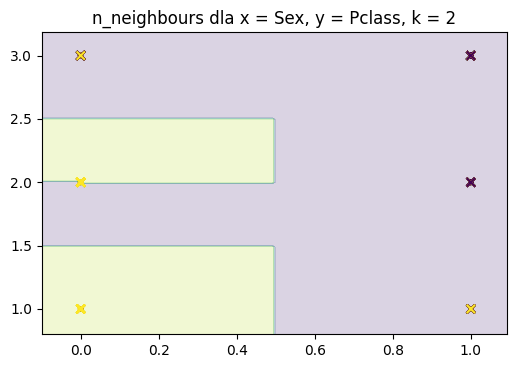

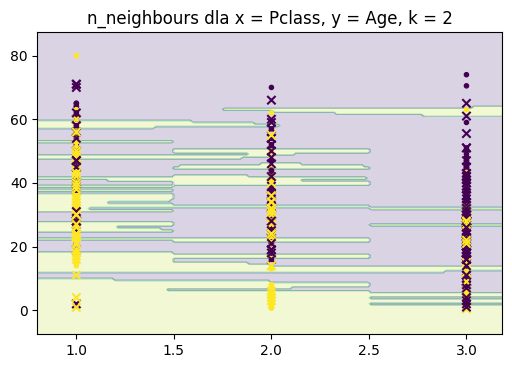

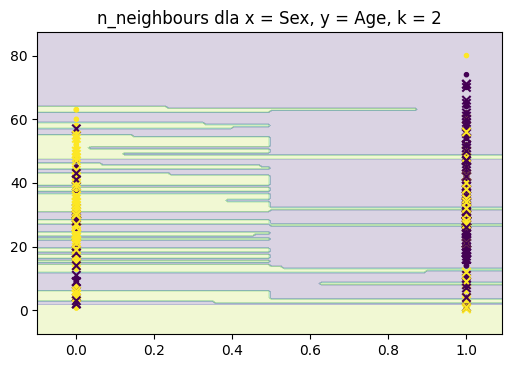

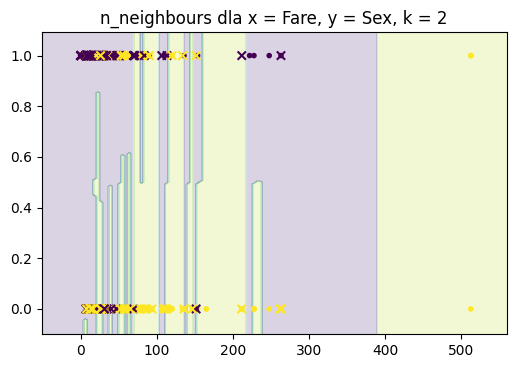

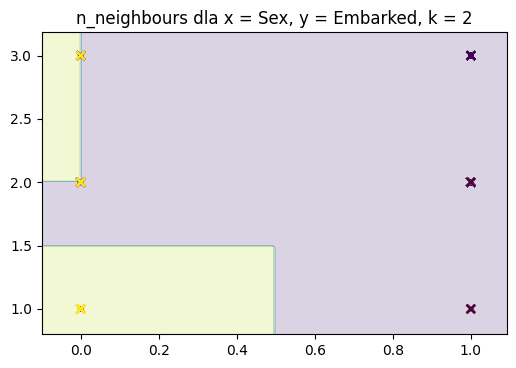

In [184]:
#wybór liczby sąsiadów
k = 2

# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "n_neighbours dla x = " + atrybut_1 + ", y = " + atrybut_2 + ", k = " + str(k))

Najlepsze wyniki metoda KNN pokazuje dla pary atrybutów Sex i Fare.  
Teraz w celu doboru właściwej ilości sąsiadów można wykonać analizę błędu klasyfikacji dla różnej ilości sąsiadów.

Text(0, 0.5, 'Prawdopodobienstwo bledu')

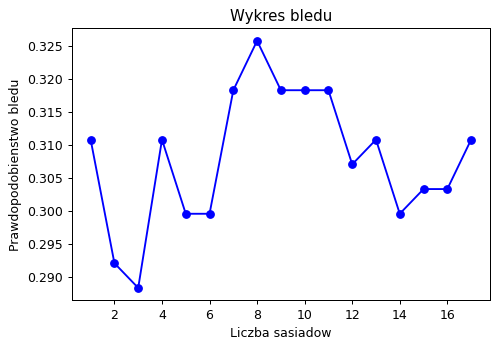

In [185]:

kvals = range(1,18)
rss_all = np.zeros(17)
for k in kvals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(dane_podzielone['opis_ucz'],dane_podzielone['dec_ucz'])
    predictions = model.predict(dane_podzielone['opis_test'])
    rss_all[k-1] = 1-model.score(dane_podzielone['opis_test'],dane_podzielone['dec_test'])
plt.figure(dpi=90)
plt.plot(kvals, rss_all,'bo-')
plt.title('Wykres bledu')
plt.xlabel('Liczba sasiadow')
plt.ylabel('Prawdopodobienstwo bledu')

Optymalna liczba sąsiadów: 3

#### Drzewa decyzyjne

macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528089887640449
0.7528089887640449
[[138  28]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.7540192926045016
0.7540192926045016
[[353  30]
 [123 116]]
macierz pomyłek - zbiór testowy, dokładność: 0.7265917602996255
0.7265917602996255
[[144  22]
 [ 51  50]]
macierz pomyłek - zbiór uczący, dokładność: 0.8295819935691319
0.8295819935691319
[[342  41]
 [ 65 174]]
macierz pomyłek - zbiór testowy, dokładność: 0.7677902621722846
0.7677902621722846
[[140  26]
 [ 36  65]]
macierz pomyłek - zbiór uczący, dokładność: 0.8472668810289389
0.8472668810289389
[[355  28]
 [ 67 172]]
macierz pomyłek - zbiór testowy, dokładność: 0.7677902621722846
0.7677902621722846
[[144  22]
 [ 40  61]]
macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528

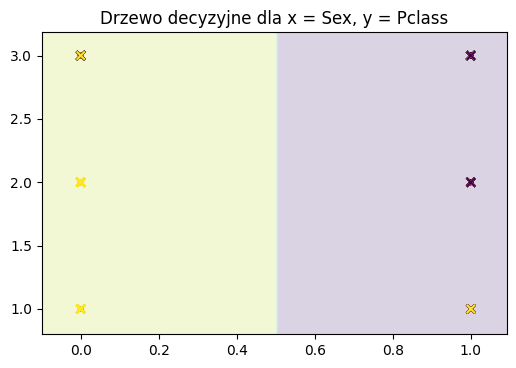

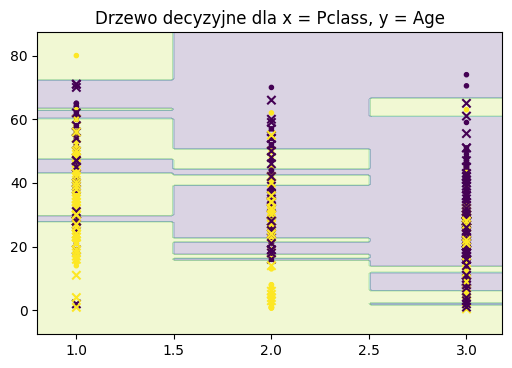

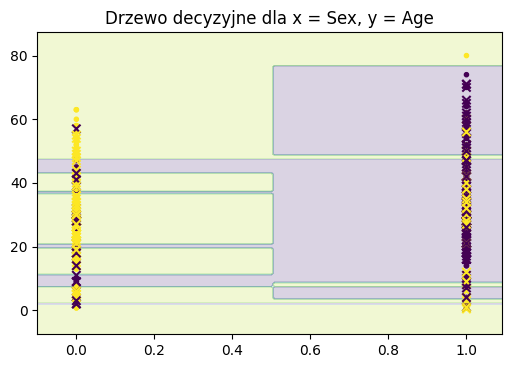

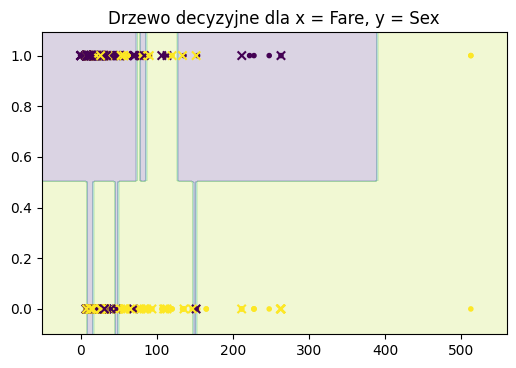

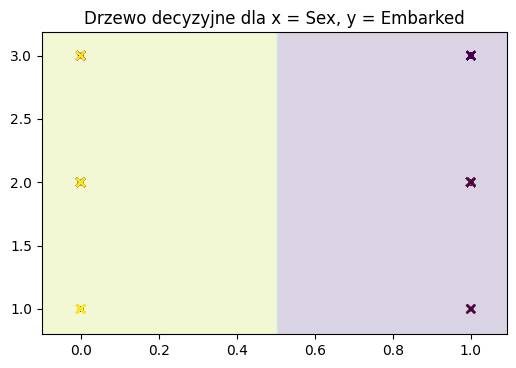

In [186]:
#głębokość drzewa
depth = 8
# zdefiniowanie modelu 
model = tree.DecisionTreeClassifier(max_depth=depth)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Drzewo decyzyjne dla x = " + atrybut_1 + ", y = " + atrybut_2)

Drzewo decyzyjne, jak i metoda KNN, najlepszy wynik pokazuje dla pary atrybutów: Sex, Fare.  
Przeanalizujemy teraz dla tej pary drzewa o różnych głebokościach

macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528089887640449
0.7528089887640449
[[138  28]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.8102893890675241
0.8102893890675241
[[332  51]
 [ 67 172]]
macierz pomyłek - zbiór testowy, dokładność: 0.7565543071161048
0.7565543071161048
[[139  27]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.8327974276527331
0.8327974276527331
[[348  35]
 [ 69 170]]
macierz pomyłek - zbiór testowy, dokładność: 0.7677902621722846
0.7677902621722846
[[143  23]
 [ 39  62]]
macierz pomyłek - zbiór uczący, dokładność: 0.8472668810289389
0.8472668810289389
[[355  28]
 [ 67 172]]
macierz pomyłek - zbiór testowy, dokładność: 0.7677902621722846
0.7677902621722846
[[144  22]
 [ 40  61]]
macierz pomyłek - zbiór uczący, dokładność: 0.8520900321543409
0.8520900321543409
[[363  20]
 [ 72 167]]
macierz pomyłek - zbiór testowy, dokładność: 0.7752

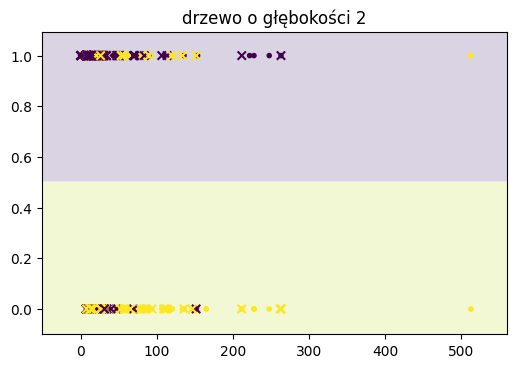

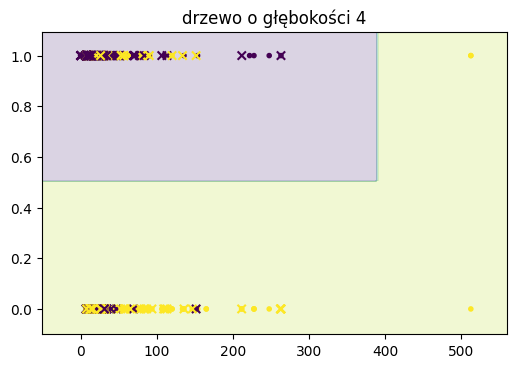

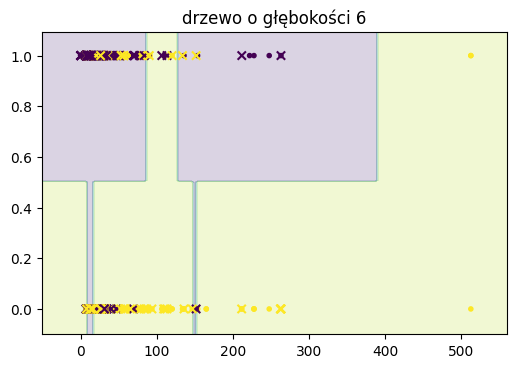

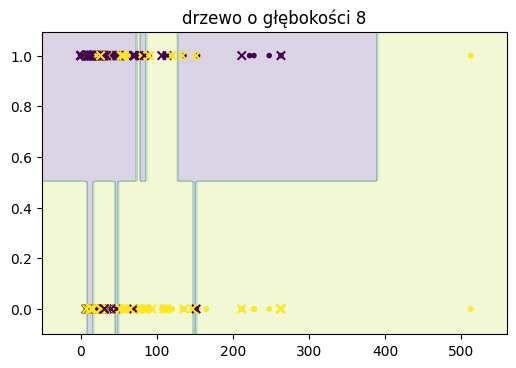

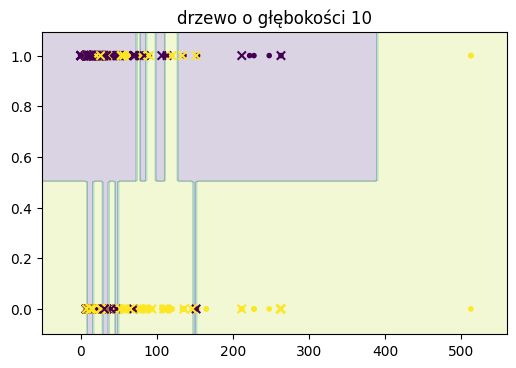

In [187]:
atrybut_1  = 'Fare'
atrybut_2 = 'Sex'

atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1
for g in [2,4,6,8,10]:
    drzewo = tree.DecisionTreeClassifier(max_depth=g)
    tekst = "drzewo o głębokości " + str(g) 
    granice(drzewo ,dane_podzielone,atrybut_1_index,atrybut_2_index,tekst)
    weryfikuj(drzewo,dane_podzielone,[atrybut_1_index,atrybut_2_index])


Wnioski: Drzewo decyzyjne najlepiej działa dla takich samych atrybutów, co i metoda KNN  
Maksymalna głębokość drzewa do określonej wartości wpływa na jakość klasyfikacji. Im większa maksymalna możliwa głębokość drzewa, tym mniej błędów popełnia model.

#### Metoda najbliższych prototypów

macierz pomyłek - zbiór uczący, dokładność: 0.7331189710610932
0.7331189710610932
[[323  60]
 [106 133]]
macierz pomyłek - zbiór testowy, dokładność: 0.7902621722846442
0.7902621722846442
[[140  26]
 [ 30  71]]
macierz pomyłek - zbiór uczący, dokładność: 0.4533762057877814
0.4533762057877814
[[137 246]
 [ 94 145]]
macierz pomyłek - zbiór testowy, dokładność: 0.4681647940074906
0.4681647940074906
[[69 97]
 [45 56]]
macierz pomyłek - zbiór uczący, dokładność: 0.46141479099678456
0.46141479099678456
[[138 245]
 [ 90 149]]
macierz pomyłek - zbiór testowy, dokładność: 0.46441947565543074
0.46441947565543074
[[68 98]
 [45 56]]
macierz pomyłek - zbiór uczący, dokładność: 0.6672025723472669
0.6672025723472669
[[331  52]
 [155  84]]
macierz pomyłek - zbiór testowy, dokładność: 0.6666666666666666
0.6666666666666666
[[141  25]
 [ 64  37]]
macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.75280898

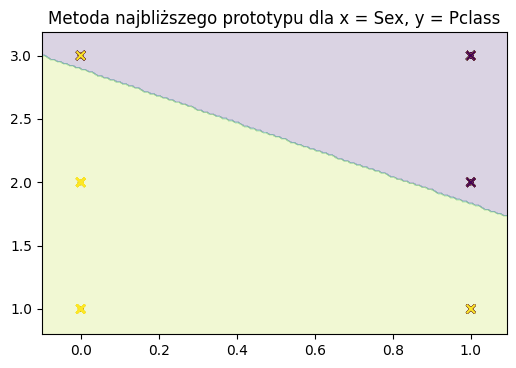

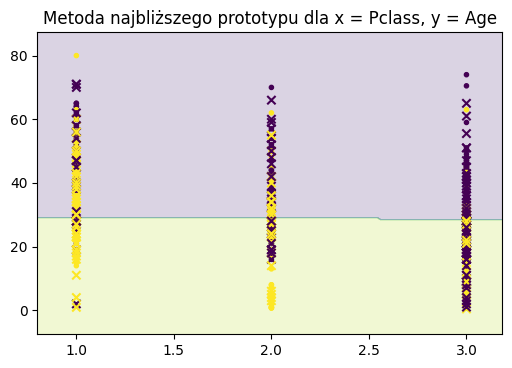

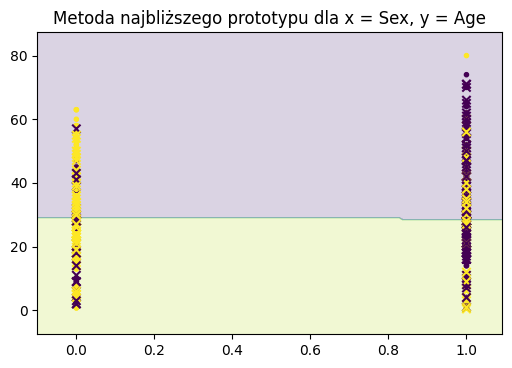

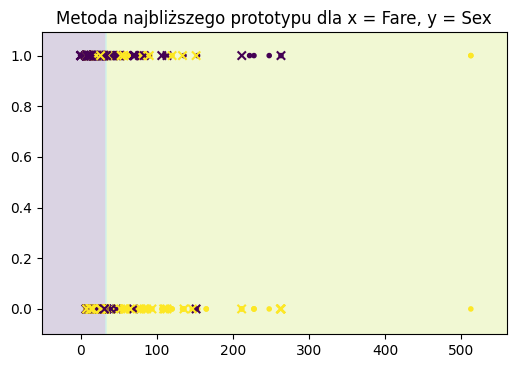

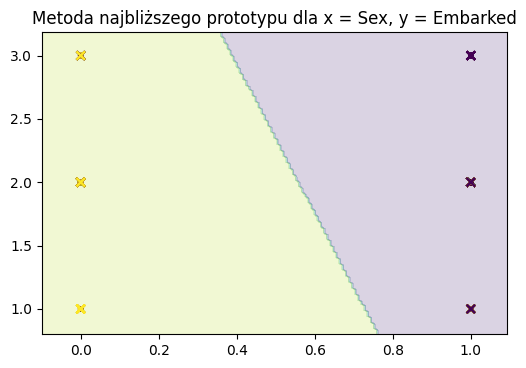

In [188]:
# zdefiniowanie modelu 
model = NearestCentroid()

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Metoda najbliższego prototypu dla x = " + atrybut_1 + ", y = " + atrybut_2)

Wnioski:
W odróżnieniu od kalsyfikatorów KNN i Drzewa decyzyjnego, klasyfikator najbliższego prototypu pokazuje gorze wyniki. Ale ta metoda oszczędza pamięć i czas przez redukcję zbioru uczącego do zbioru składającego się z prototypów klas, co jest główną zaletą tej metody.  
Najlepiej dopasowaną do tej metody para atrybutów to nie Sex i Fare, jak w poprzednich metodach, a Sex i Embarked

#### Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528089887640449
0.7528089887640449
[[138  28]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.6881028938906752
0.6881028938906752
[[324  59]
 [135 104]]
macierz pomyłek - zbiór testowy, dokładność: 0.6966292134831461
0.6966292134831461
[[137  29]
 [ 52  49]]
macierz pomyłek - zbiór uczący, dokładność: 0.8022508038585209
0.8022508038585209
[[330  53]
 [ 70 169]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528089887640449
0.7528089887640449
[[138  28]
 [ 38  63]]
macierz pomyłek - zbiór uczący, dokładność: 0.7942122186495176
0.7942122186495176
[[322  61]
 [ 67 172]]
macierz pomyłek - zbiór testowy, dokładność: 0.7490636704119851
0.7490636704119851
[[134  32]
 [ 35  66]]
macierz pomyłek - zbiór uczący, dokładność: 0.8006430868167203
0.8006430868167203
[[330  53]
 [ 71 168]]
macierz pomyłek - zbiór testowy, dokładność: 0.7528

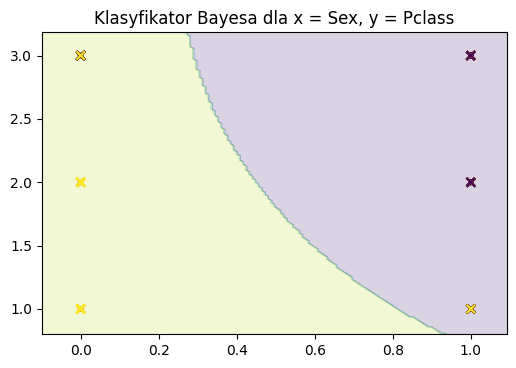

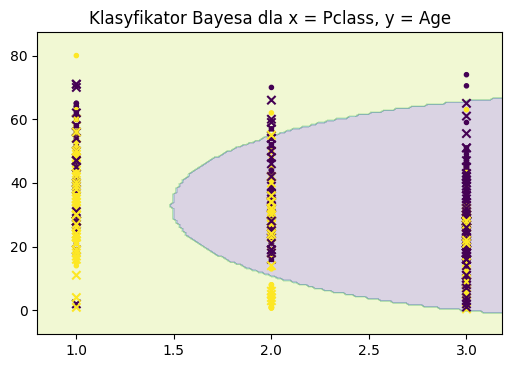

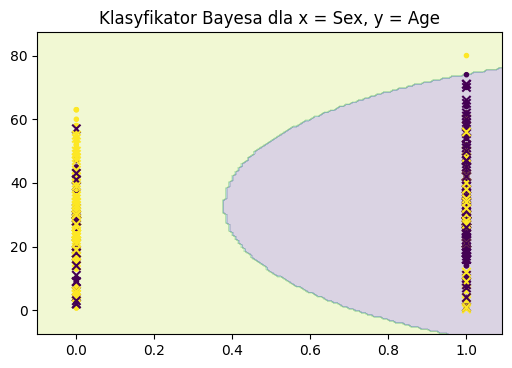

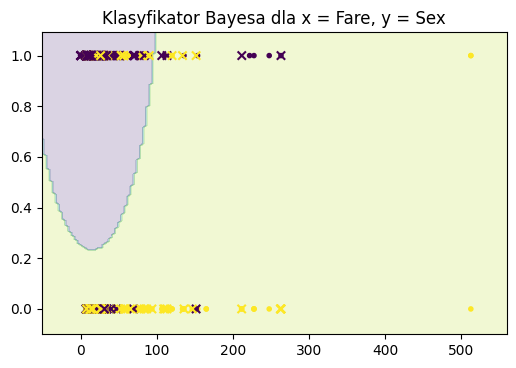

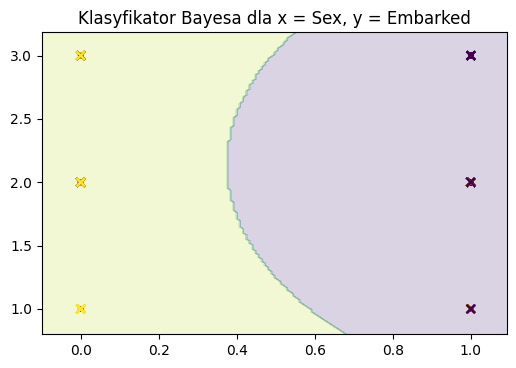

In [189]:
# zdefiniowanie modelu klasyfikatora
model = KNeighborsClassifier(n_neighbors=k)

for aktualne_atrybuty in atrybuty:
    atrybut_1  = aktualne_atrybuty[0]
    atrybut_2 = aktualne_atrybuty[1]

    atrybut_1_index = dane.columns.get_loc(atrybut_1) - 1
    atrybut_2_index = dane.columns.get_loc(atrybut_2) - 1

    # zdefiniowanie modelu klasyfikatora
    model = GaussianNB()

    # weryfikacja
    weryfikuj(model,dane_podzielone,[atrybut_1_index,atrybut_2_index])

    granice(model, dane_podzielone, atrybut_1_index, atrybut_2_index, "Klasyfikator Bayesa dla x = " + atrybut_1 + ", y = " + atrybut_2)

### Osobna analiza dla kobiet

<Axes: xlabel='Survived', ylabel='Embarked'>

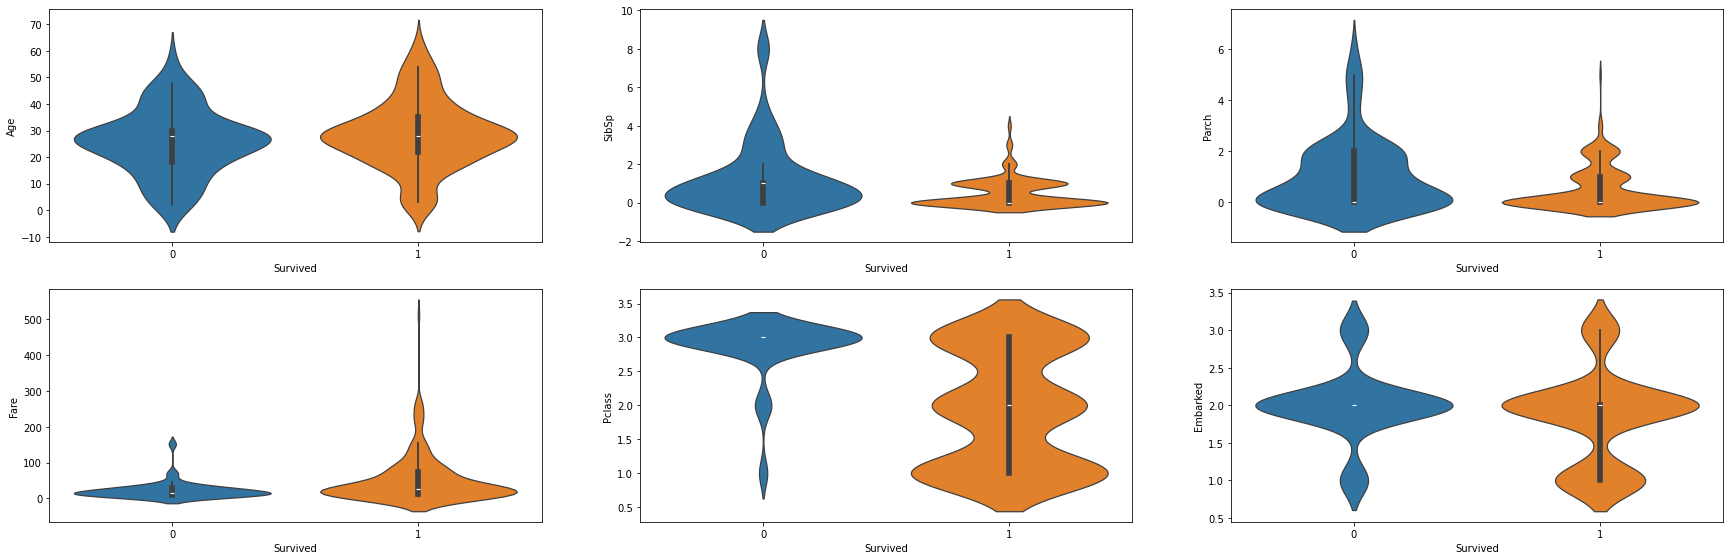

In [190]:
kobiety = dane[dane['Sex']==0].drop('Sex', axis=1)
plt.figure(figsize= (30,30))
plt.subplot(6, 3, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=kobiety, legend=False, hue = 'Survived')
plt.subplot(6, 3, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=kobiety, legend=False, hue = 'Survived')
plt.subplot(6, 3, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=kobiety, legend=False, hue = 'Survived')
plt.subplot(6, 3, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=kobiety, legend=False, hue = 'Survived')
plt.subplot(6, 3, 5)
sns.violinplot(x = 'Survived', y = 'Pclass', data=kobiety, legend=False, hue = 'Survived')
plt.subplot(6, 3, 6)
sns.violinplot(x = 'Survived', y = 'Embarked', data=kobiety, legend=False, hue = 'Survived')

<Axes: >

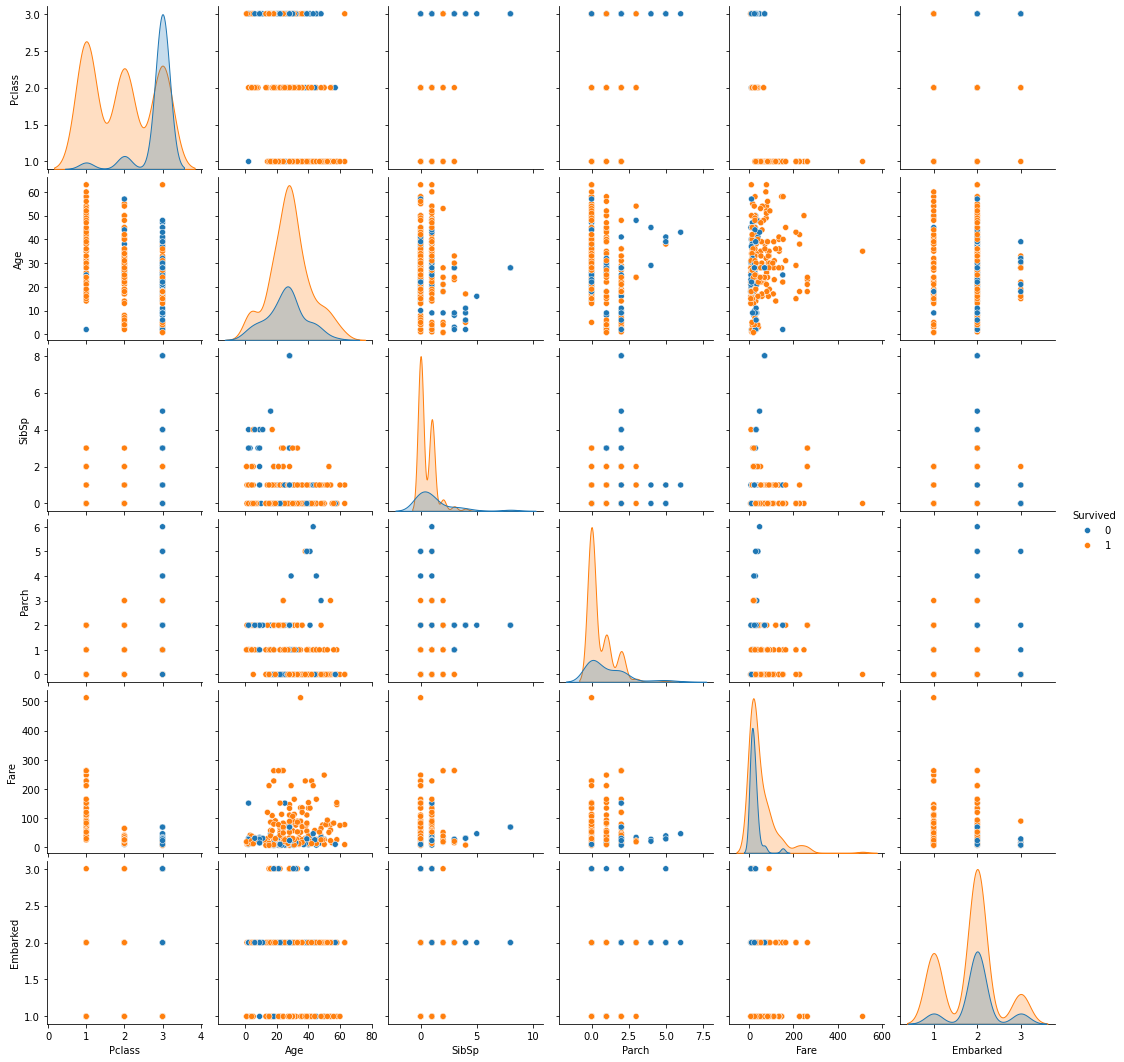

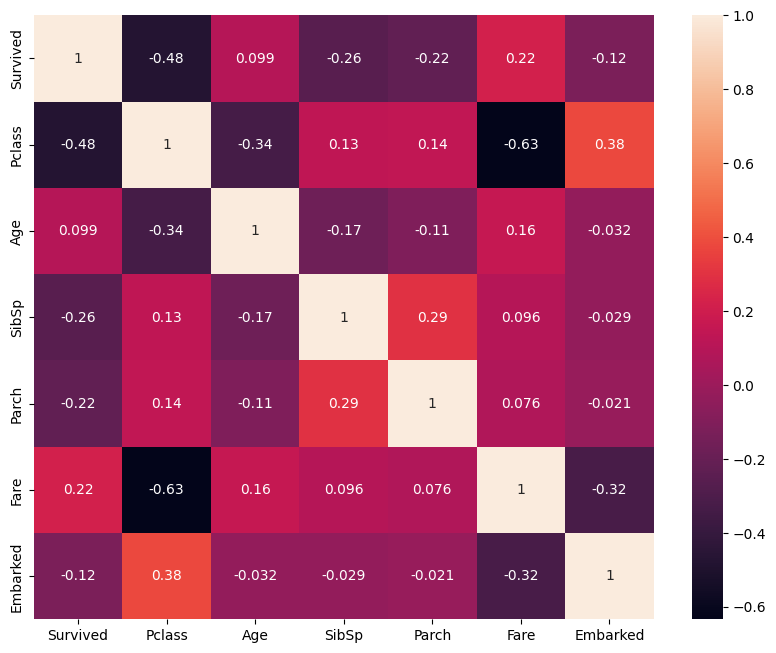

In [191]:
sns.pairplot(kobiety, kind = 'scatter', hue = "Survived")
kor = kobiety.corr()
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

Zauważamy, że:
* największy wpływ na przeżywalność kobiet miała klasa, w której podróżowały
* najmniejsze szanse na przeżycie miały kobiety podróżujące w klasie 3 oraz te które zapłaciły najmniej za przejazd (Fare)
* kobiety, które nie przeżyły zazwyczaj nie miały na pokładzie rodzeństwa ani małżonka

Do uczenia nadzorowanego użyjemy pary atrybutów Pclass i Fare oraz Pclass i SibSp

Wykonano kilka podziałów na zbiór testowy i uczący
dla obu płci
Atrybuty: Pclass, Fare
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.702572347266881
0.702572347266881
[[329  48]
 [137 108]]
macierz pomyłek - zbiór testowy, dokładność: 0.602996254681648
0.602996254681648
[[135  37]
 [ 69  26]]
Uśredniona dokładność dla zbioru uczącego: 0.680064308681672
Uśredniona dokładność dla zbioru testowego: 0.6666666666666667

dla kobiet
Atrybuty: Pclass, Fare
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7339449541284404
0.7339449541284404
[[ 49  11]
 [ 47 111]]
macierz pomyłek - zbiór testowy, dokładność: 0.723404255319149
0.723404255319149
[[20  1]
 [25 48]]
Uśredniona dokładność dla zbioru uczącego: 0.7247706422018348
Uśredniona dokładność dla zbioru testowego: 0.7446808510638298



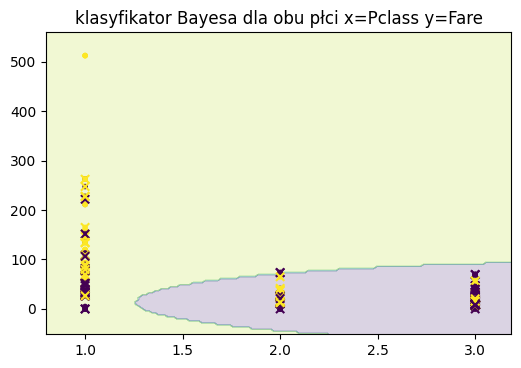

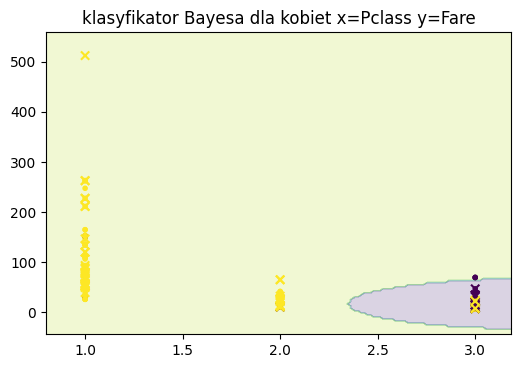

In [192]:
def show_output1(dane, a1, a2, klasyfikator, name, model=GaussianNB()):
    print(name)
    pom1 = 0
    pom2 = 0
    n=5
    for i in range(n):
        d = podziel(dane, 0.3)
        [s1, s2] = dokladnosc(model,d,[a1,a2])
        pom1=pom1+s1
        pom2=pom2+s2
    print("Atrybuty: "+str(d["opis_ucz"].columns[a1])+", "+str(d["opis_ucz"].columns[a2]))
    print("Weryfikacja klasyfikacji dla jednego z podziałów")
    weryfikuj(model,d,[a1,a2])
    print("Uśredniona dokładność dla zbioru uczącego:", pom1/n)
    print("Uśredniona dokładność dla zbioru testowego:", pom2/n)
    print()
    granice(model,d,a1,a2,"klasyfikator "+klasyfikator+" "+str(name)+" x="+str(d["opis_ucz"].columns[a1])+" y="+str(d["opis_ucz"].columns[a2]))

print("Wykonano kilka podziałów na zbiór testowy i uczący")
a1=0
a2=4
show_output1(dane, a1, a2+1, "Bayesa","dla obu płci")
show_output1(kobiety, a1, a2, "Bayesa","dla kobiet")



dla obu płci
Atrybuty: Pclass, SibSp
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6816720257234726
0.6816720257234726
[[268 110]
 [ 88 156]]
macierz pomyłek - zbiór testowy, dokładność: 0.6142322097378277
0.6142322097378277
[[110  61]
 [ 42  54]]
Uśredniona dokładność dla zbioru uczącego: 0.6758842443729903
Uśredniona dokładność dla zbioru testowego: 0.650936329588015

dla kobiet
Atrybuty: Pclass, SibSp
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7568807339449541
0.7568807339449541
[[ 13  48]
 [  5 152]]
macierz pomyłek - zbiór testowy, dokładność: 0.8085106382978723
0.8085106382978723
[[ 5 15]
 [ 3 71]]
Uśredniona dokładność dla zbioru uczącego: 0.7697247706422019
Uśredniona dokładność dla zbioru testowego: 0.778723404255319



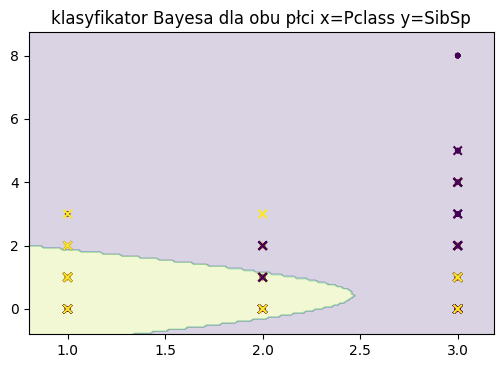

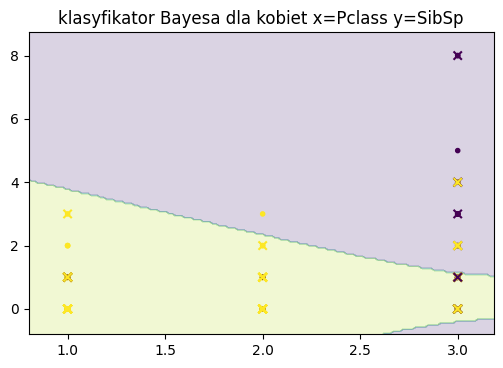

In [193]:
a1=0
a2=2
show_output1(dane, a1, a2+1, "Bayesa","dla obu płci")
show_output1(kobiety, a1, a2, "Bayesa","dla kobiet")

### Osobna analiza dla mężczyzn

       Survived  Pclass    Age  SibSp  Parch   Fare  Embarked
count    577.00  577.00 577.00 577.00 577.00 577.00    577.00
mean       0.19    2.39  30.14   0.43   0.24  25.52      1.91
std        0.39    0.81  13.05   1.06   0.61  43.14      0.48
min        0.00    1.00   0.42   0.00   0.00   0.00      1.00
25%        0.00    2.00  23.00   0.00   0.00   7.90      2.00
50%        0.00    3.00  28.00   0.00   0.00  10.50      2.00
75%        0.00    3.00  35.00   0.00   0.00  26.55      2.00
max        1.00    3.00  80.00   8.00   5.00 512.33      3.00


<Axes: xlabel='Survived', ylabel='Embarked'>

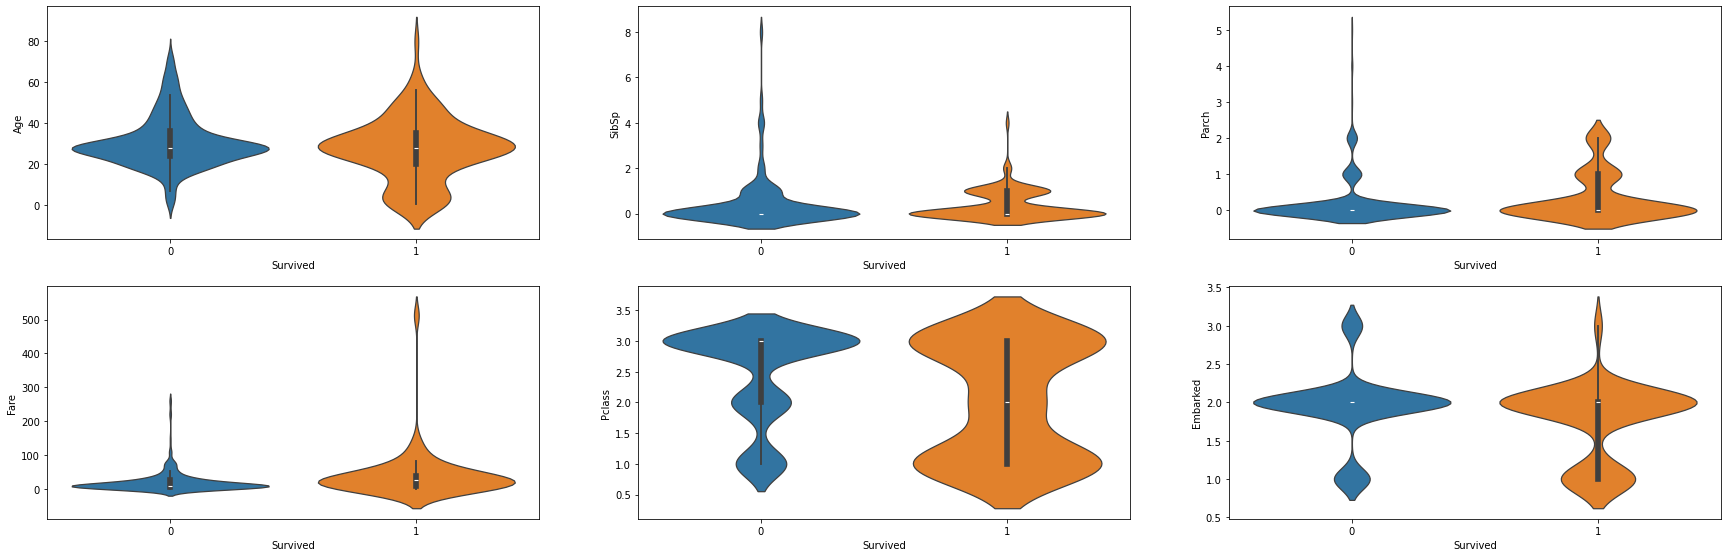

In [194]:
mezczyzni = dane[dane['Sex']==1].drop('Sex', axis=1)
print(mezczyzni.describe())
plt.figure(figsize= (30,30))
plt.subplot(6, 3, 1)
sns.violinplot(x = 'Survived', y = 'Age', data=mezczyzni, legend=False, hue = 'Survived')
plt.subplot(6, 3, 2)
sns.violinplot(x = 'Survived', y = 'SibSp', data=mezczyzni, legend=False, hue = 'Survived')
plt.subplot(6, 3, 3)
sns.violinplot(x = 'Survived', y = 'Parch', data=mezczyzni, legend=False, hue = 'Survived')
plt.subplot(6, 3, 4)
sns.violinplot(x = 'Survived', y = 'Fare', data=mezczyzni, legend=False, hue = 'Survived')
plt.subplot(6, 3, 5)
sns.violinplot(x = 'Survived', y = 'Pclass', data=mezczyzni, legend=False, hue = 'Survived')
plt.subplot(6, 3, 6)
sns.violinplot(x = 'Survived', y = 'Embarked', data=mezczyzni, legend=False, hue = 'Survived')

<Axes: title={'center': 'Fare - czwarty kwartyl'}, xlabel='Survived', ylabel='count'>

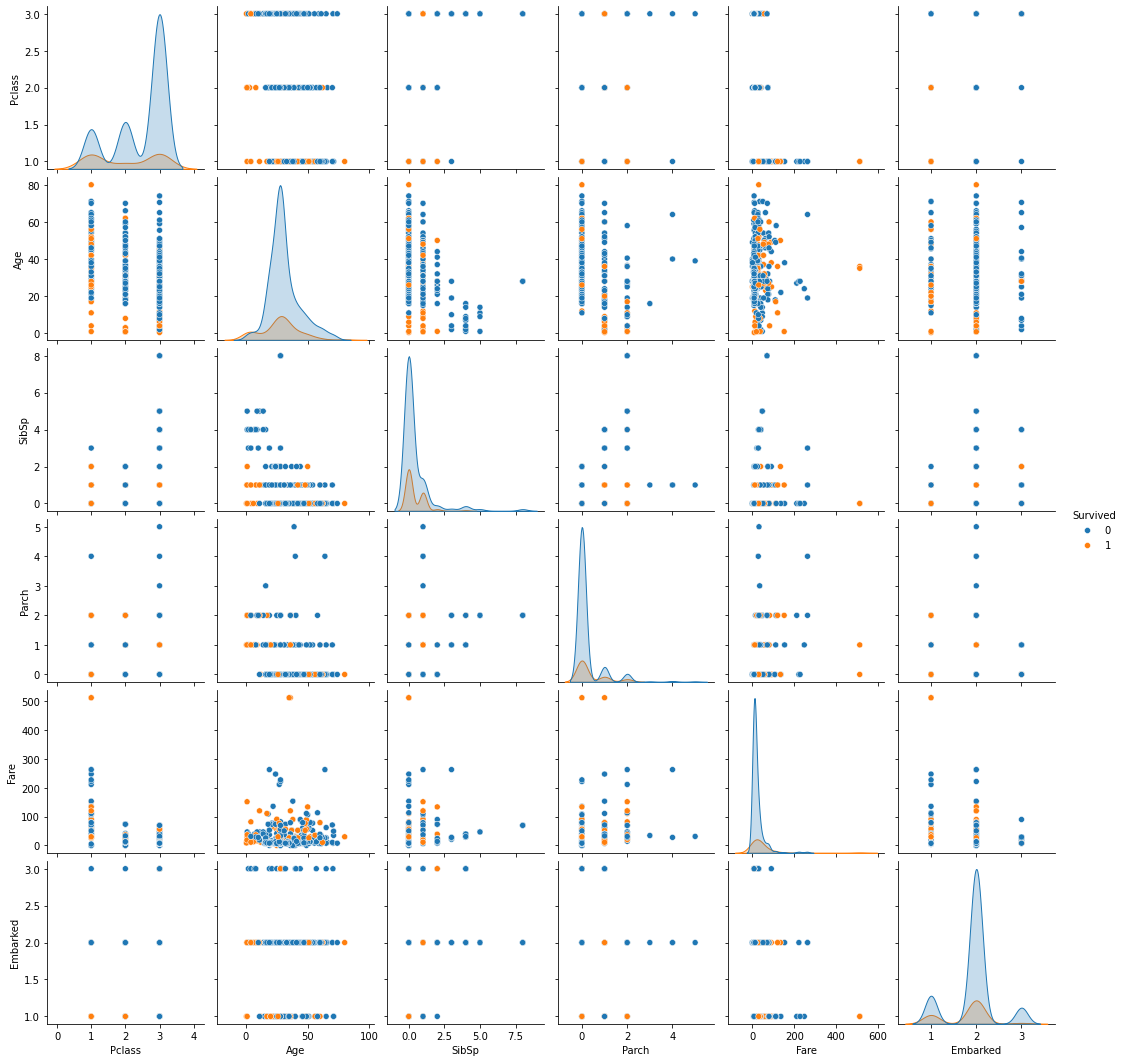

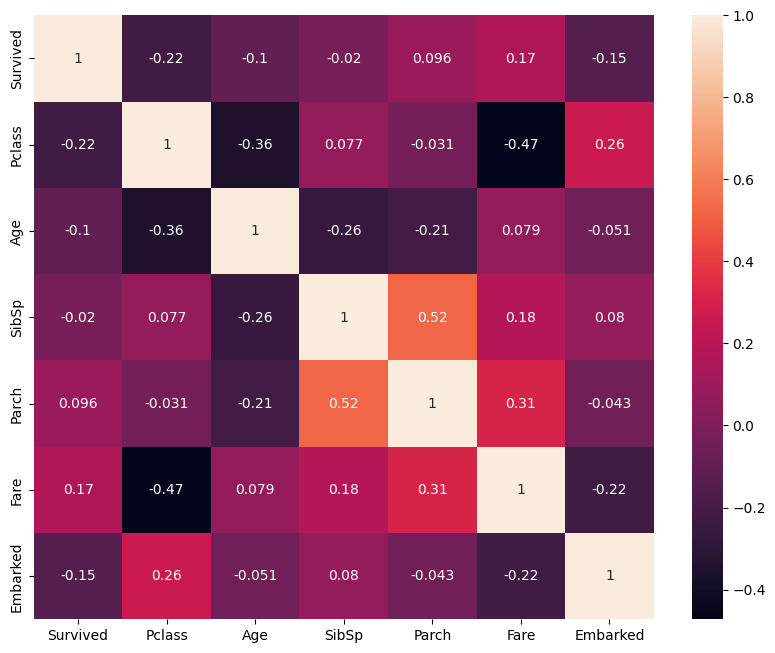

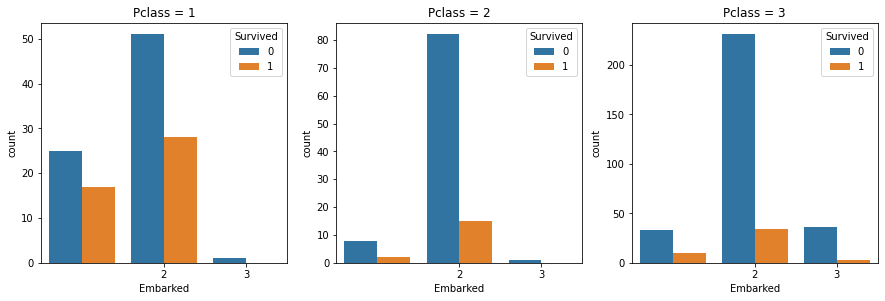

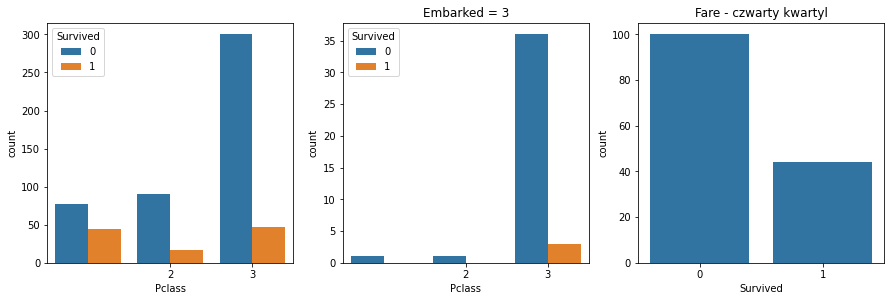

In [195]:
sns.pairplot(mezczyzni, kind = 'scatter', hue = "Survived")
kor = mezczyzni.corr()
plt.figure(figsize=(10,8), dpi =100)
sns.heatmap(kor, annot=kor)

plt.figure(figsize= (15,15))
plt.subplot(3, 3, 1)
plt.xticks([1,2,3])
plt.title("Pclass = 1")
sns.countplot(data=mezczyzni[mezczyzni["Pclass"]==1], x="Embarked", hue="Survived")
plt.subplot(3, 3, 2)
plt.xticks([1,2,3])
plt.title("Pclass = 2")
sns.countplot(data=mezczyzni[mezczyzni["Pclass"]==2], x="Embarked", hue="Survived")
plt.subplot(3, 3, 3)
plt.xticks([1,2,3])
plt.title("Pclass = 3")
sns.countplot(data=mezczyzni[mezczyzni["Pclass"]==3], x="Embarked", hue="Survived")

plt.figure(figsize= (15,15))
plt.subplot(3, 3, 1)
plt.xticks([1,2,3])
sns.countplot(data=mezczyzni, x="Pclass", hue="Survived")
plt.subplot(3, 3, 2)
plt.xticks([1,2,3])
plt.title("Embarked = 3")
sns.countplot(data=mezczyzni[mezczyzni['Embarked']==3], x="Pclass", hue="Survived")
plt.subplot(3, 3, 3)
plt.xticks([0,1])
plt.title("Fare - czwarty kwartyl")
sns.countplot(data=mezczyzni[mezczyzni['Fare']>26.55], x="Survived")

Zauważamy, że:
* najbardziej skorelowane z przeżywalnością są atrybuty Pclass, Fare, Embarked, lecz ta korelacja nie jest wysoka ok. +/-0,2
* w klasie 1 mężczyźni mieli największe szanse na przeżycie (przeżyła ok. 1/3)
* prawie wszyscy mężczyźni, którzy wsiedli w porcie Queenstown zginęli (jest to prawdopodobnie ściśle powiązane z faktem, że mężczyźni wsiadający w Queenstown podróżowali 3 klasą)
* ok. 1/3 mężczyzn płacących za podróż najwięcej (czwarty kwartyl Fare) przeżyła

Wykonano kilka podziałów na zbiór testowy i uczący
dla obu płci
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6672025723472669
0.6672025723472669
[[317  63]
 [144  98]]
macierz pomyłek - zbiór testowy, dokładność: 0.7078651685393258
0.7078651685393258
[[144  25]
 [ 53  45]]
Uśredniona dokładność dla zbioru uczącego: 0.682315112540193
Uśredniona dokładność dla zbioru testowego: 0.6726591760299625

dla mezczyzn
Atrybuty: Pclass, Embarked
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7866004962779156
0.7866004962779156
[[304  21]
 [ 65  13]]
macierz pomyłek - zbiór testowy, dokładność: 0.8218390804597702
0.8218390804597702
[[139   4]
 [ 27   4]]
Uśredniona dokładność dla zbioru uczącego: 0.7925558312655087
Uśredniona dokładność dla zbioru testowego: 0.8080459770114942



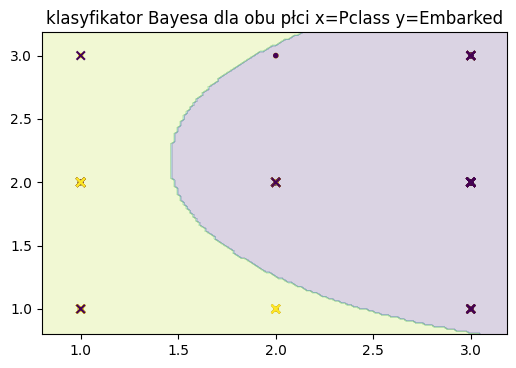

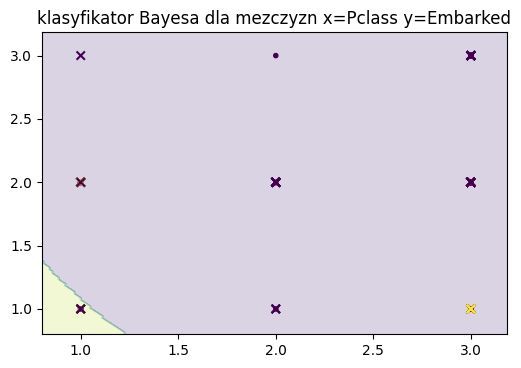

In [196]:
print("Wykonano kilka podziałów na zbiór testowy i uczący")
a1=0
a2=5
show_output1(dane, a1, a2+1, "Bayesa","dla obu płci")
show_output1(mezczyzni, a1, a2, "Bayesa","dla mezczyzn")

Wykonano kilka podziałów na zbiór testowy i uczący
dla obu płci
Atrybuty: Pclass, Fare
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6704180064308681
0.6704180064308681
[[342  38]
 [167  75]]
macierz pomyłek - zbiór testowy, dokładność: 0.6966292134831461
0.6966292134831461
[[154  15]
 [ 66  32]]
Uśredniona dokładność dla zbioru uczącego: 0.6816720257234726
Uśredniona dokładność dla zbioru testowego: 0.6591760299625468

dla mezczyzn
Atrybuty: Pclass, Fare
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.8163771712158809
0.8163771712158809
[[321  12]
 [ 62   8]]
macierz pomyłek - zbiór testowy, dokładność: 0.7701149425287356
0.7701149425287356
[[131   4]
 [ 36   3]]
Uśredniona dokładność dla zbioru uczącego: 0.8153846153846154
Uśredniona dokładność dla zbioru testowego: 0.7620689655172412



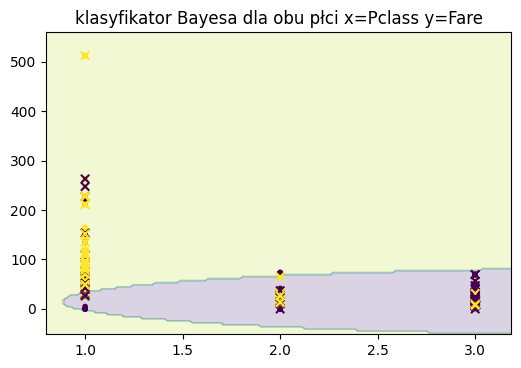

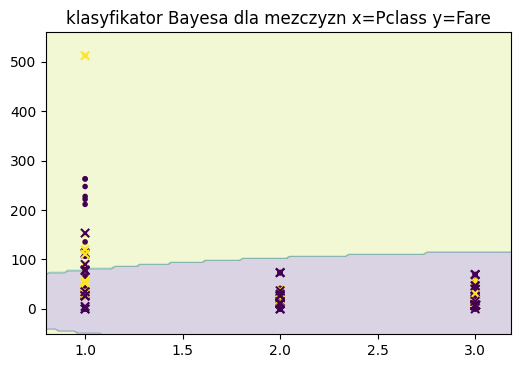

In [197]:
print("Wykonano kilka podziałów na zbiór testowy i uczący")
a1=0
a2=4
show_output1(dane, a1, a2+1, "Bayesa","dla obu płci")
show_output1(mezczyzni, a1, a2, "Bayesa","dla mezczyzn")

dla obu płci
Atrybuty: Pclass, Age
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.6929260450160771
0.6929260450160771
[[324  50]
 [141 107]]
macierz pomyłek - zbiór testowy, dokładność: 0.6891385767790262
0.6891385767790262
[[145  30]
 [ 53  39]]
Uśredniona dokładność dla zbioru uczącego: 0.6916398713826366
Uśredniona dokładność dla zbioru testowego: 0.6674157303370787

dla kobiet
Atrybuty: Pclass, Age
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.7155963302752294
0.7155963302752294
[[ 43  13]
 [ 49 113]]
macierz pomyłek - zbiór testowy, dokładność: 0.7127659574468085
0.7127659574468085
[[20  5]
 [22 47]]
Uśredniona dokładność dla zbioru uczącego: 0.7339449541284404
Uśredniona dokładność dla zbioru testowego: 0.7212765957446808

dla mężczyzn
Atrybuty: Pclass, Age
Weryfikacja klasyfikacji dla jednego z podziałów
macierz pomyłek - zbiór uczący, dokładność: 0.8014888337468983
0.801488833746898

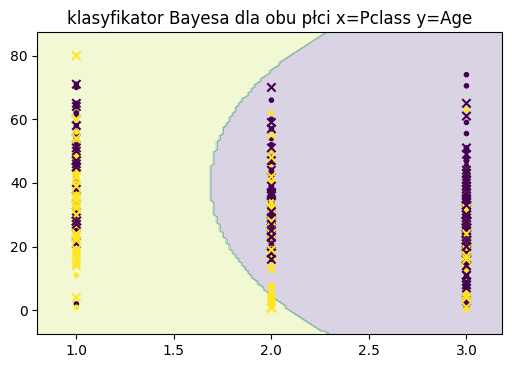

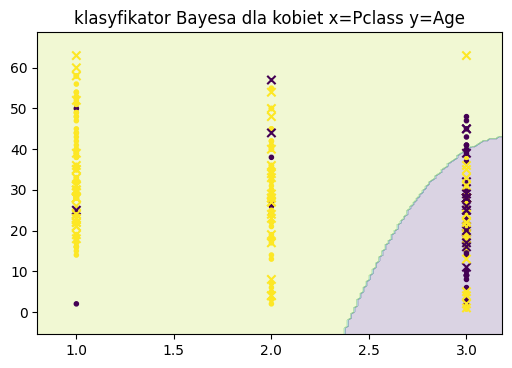

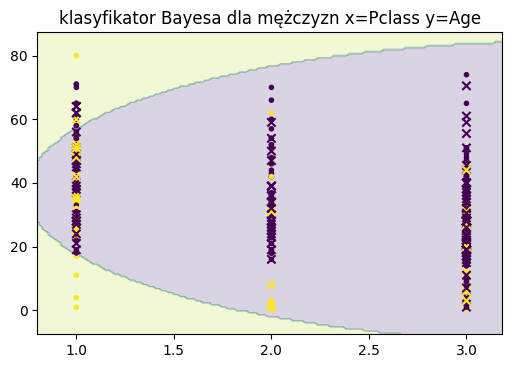

In [198]:
a1=0
a2=1
show_output1(dane, a1, a2+1, "Bayesa","dla obu płci")
show_output1(kobiety, a1, a2, "Bayesa","dla kobiet")
show_output1(mezczyzni, a1, a2, "Bayesa","dla mężczyzn")

Wnioski:
* Otrzymane wyniki pokazują, że płeć jest kluczowym czynnikiem wpływającym na przeżycie na Titanicu - kobiety miały większe szanse na przeżycie
* Dokładność klasyfikacji w przypadku, gdy uwzględniamy atrybut płeć jest wyższa o ok. 0,1.
* Analiza przeprowadzona osobno dla kobiet i mężczyzn pozwoliła na lepsze wychwycenie zależności specyficznych dla danej grupy. Np. Przeżywalność dla mężczyzn była bardziej ograniczona ze względu na pierwszeństwo ratowania kobiet i dzieci, więc w większym stopniu zależało m.in. od klasy
